In [1]:
#data preprocessing
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv('/content/ml dataset1.csv')
print("Missing values in each column:\n", df.isnull().sum())

Missing values in each column:
 ID                 0
SegmentID          0
Roadway Name       0
From               0
To                 0
Direction          0
Date               0
Week               0
Hour               0
Traffic Volume    49
dtype: int64


In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
iris=load_iris()
X=iris.data
y=iris.target
clf=RandomForestClassifier(n_estimators=100,max_depth=4,random_state=42,n_jobs=-1)
clf.fit(X,y)
for name,score in zip(iris["feature_names"],clf.feature_importances_):
  print(name,score)

sepal length (cm) 0.10416599559469063
sepal width (cm) 0.015341855114415973
petal length (cm) 0.43782821418285756
petal width (cm) 0.44266393510803587


In [3]:
def hour_range_to_numeric(hour_str):
    start, end = hour_str.split('-')
    start_hour = int(start.split(':')[0])
    end_hour = int(end.split(':')[0])
    if end_hour == 1:
        end_hour += 12
    return (start_hour + end_hour) / 2
df["Hour"]=df["Hour"].apply(hour_range_to_numeric)

In [ ]:
df.head()

,ID,SegmentID,Roadway Name,From,To,Direction,Date,Week,Hour,Traffic Volume
0,1,15540,42,185,186,1,09-01-2012,2,12.5,20
1,2,15540,42,185,186,1,10-01-2012,2,12.5,21
2,3,15540,42,185,186,1,11-01-2012,2,12.5,27
3,4,15540,42,185,186,1,12-01-2012,2,12.5,22
4,5,15540,42,185,186,1,13-01-2012,2,12.5,31


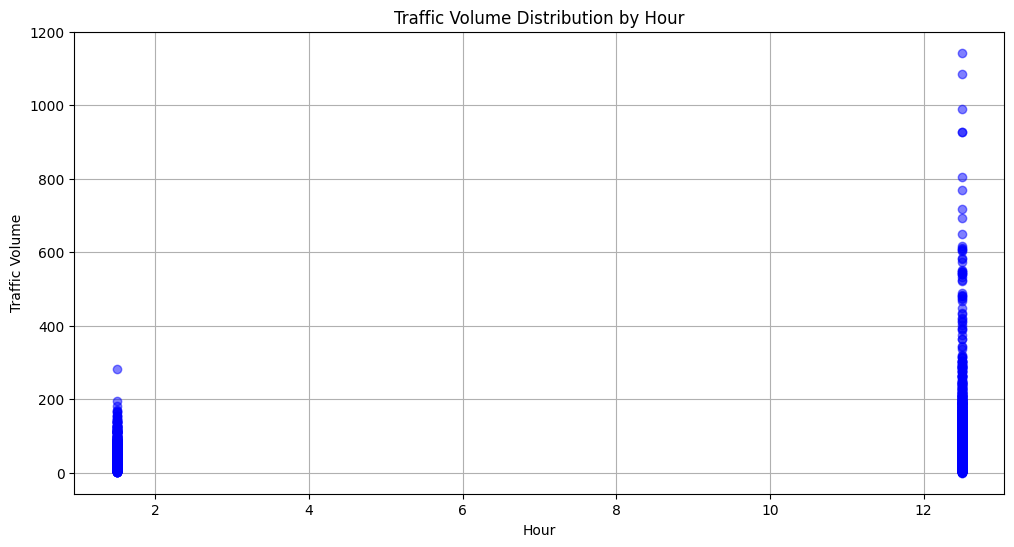

In [4]:
#data analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df['Hour'], df['Traffic Volume'], 'bo', alpha=0.5)
plt.title('Traffic Volume Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Traffic Volume')
plt.grid(True)
plt.show()


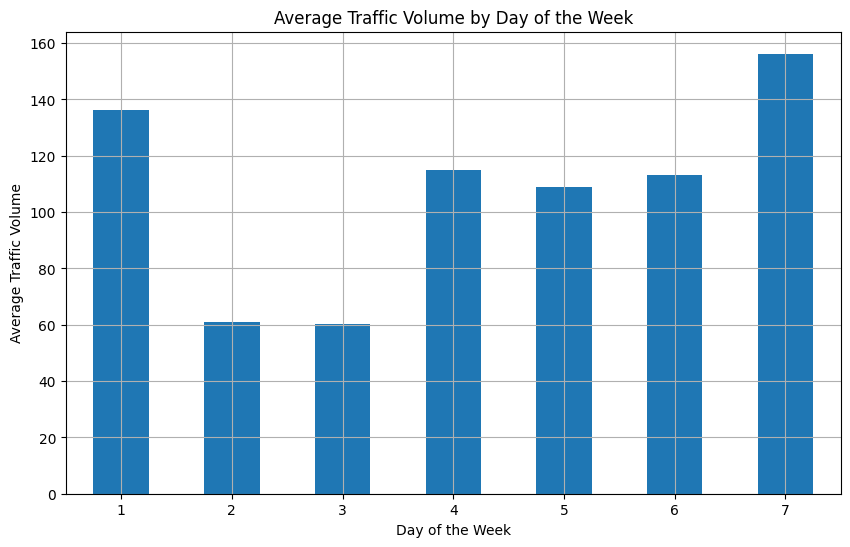

In [5]:
# Average Traffic Volume by Day of the Week
average_traffic_by_week = df.groupby('Week')['Traffic Volume'].mean()

plt.figure(figsize=(10, 6))
average_traffic_by_week.plot(kind='bar')
plt.title('Average Traffic Volume by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Traffic Volume')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


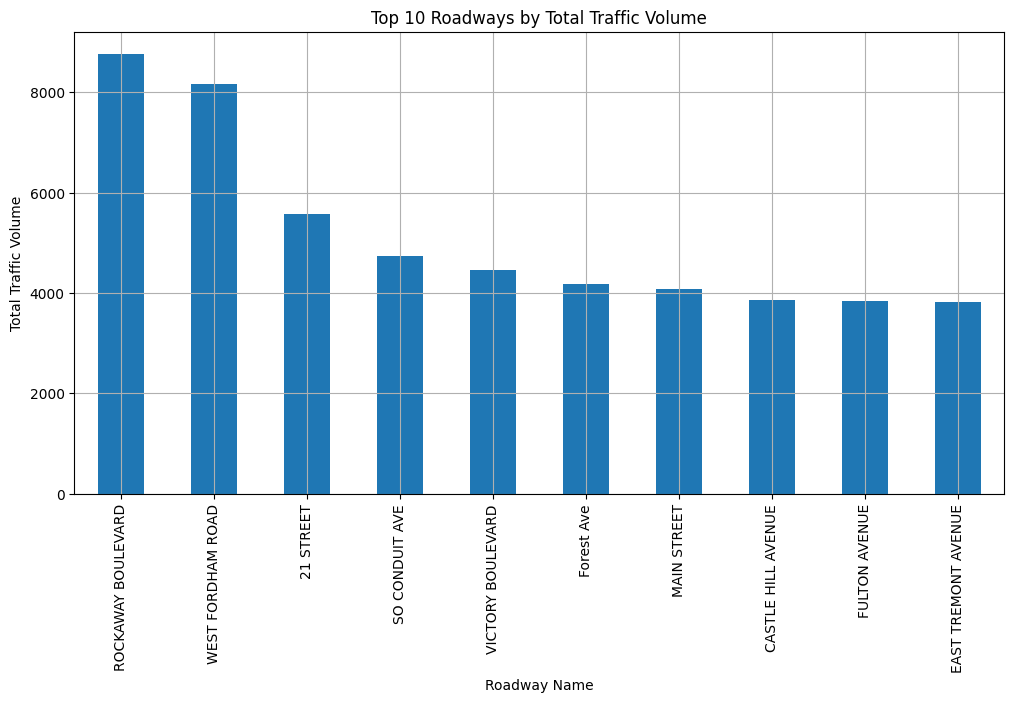

In [6]:
# Traffic Volume by Roadway Name
traffic_by_roadway = df.groupby('Roadway Name')['Traffic Volume'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
traffic_by_roadway.plot(kind='bar')
plt.title('Top 10 Roadways by Total Traffic Volume')
plt.xlabel('Roadway Name')
plt.ylabel('Total Traffic Volume')
plt.grid(True)
plt.show()


In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
def hour_range_to_numeric(hour_str):
    start, end = hour_str.split('-')
    start_hour = int(start.split(':')[0])
    end_hour = int(end.split(':')[0])
    if end_hour == 1:
        end_hour += 12
    return (start_hour + end_hour) / 2
df = pd.read_csv('/content/ml dataset1.csv')

df['Traffic Volume'] = df['Traffic Volume'].fillna(df['Traffic Volume'].mean())

df['Hour'] = df['Hour'].apply(hour_range_to_numeric)
X = df[['SegmentID', 'Week', 'Hour']]
y = df['Traffic Volume']

model_rf = RandomForestRegressor(random_state=60)

model_rf.fit(X, y)
def predict_traffic_volume():
    segment_id = int(input("Enter Segment ID: "))
    week = int(input("Enter Week number: "))
    hour_str = input("Enter Hour range (e.g., '12:00-1:00 AM'): ")
    hour = hour_range_to_numeric(hour_str)
    if(segment_id not in df['SegmentID'].values):
        print("Invalid Segment ID")
        return


    new_data_rf = pd.DataFrame({'SegmentID': [segment_id], 'Week': [week], 'Hour': [hour]})


    predicted_volume_rf = model_rf.predict(new_data_rf)

    print(f'Predicted Traffic Volume: {predicted_volume_rf[0]:.2f}')


    y_pred_rf = model_rf.predict(X)
    mse_rf = mean_squared_error(y, y_pred_rf)
    rmse_rf = np.sqrt(mse_rf)

    print(f'Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}')
    print(f'Random Forest - Root Mean Squared Error (RMSE): {rmse_rf:.2f}')

predict_traffic_volume()


Enter Segment ID: 	15540
Enter Week number: 2
Enter Hour range (e.g., '12:00-1:00 AM'): 1:00-2:00 AM
Predicted Traffic Volume: 18.31
Random Forest - Mean Squared Error (MSE): 1202.80
Random Forest - Root Mean Squared Error (RMSE): 34.68


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import numpy as np

def hour_range_to_numeric(hour_str):
    start, end = hour_str.split('-')
    start_hour = int(start.split(':')[0])
    end_hour = int(end.split(':')[0])
    if end_hour == 1:
        end_hour += 12
    return (start_hour + end_hour) / 2

df = pd.read_csv('/content/ml dataset1.csv')

df['Traffic Volume'] = df['Traffic Volume'].fillna(df['Traffic Volume'].mean())

df['Hour'] = df['Hour'].apply(hour_range_to_numeric)

X = df[['SegmentID', 'Week', 'Hour']]
y = df['Traffic Volume']
model_rf = RandomForestRegressor(random_state=42)
model_xgb = XGBRegressor(random_state=42)
ensemble_model = VotingRegressor(estimators=[
    ('Random Forest', model_rf),
    ('XGBoost', model_xgb)
])
ensemble_model.fit(X, y)
def predict_traffic_volume():
    segment_id = int(input("Enter Segment ID: "))
    week = int(input("Enter Week number: "))
    hour_str = input("Enter Hour range (e.g., '12:00-1:00 AM'): ")
    hour = hour_range_to_numeric(hour_str)
    if(segment_id not in df['SegmentID'].values):
        print("Invalid Segment ID")
        return

    new_data = pd.DataFrame({'SegmentID': [segment_id], 'Week': [week], 'Hour': [hour]})

    predicted_volume = ensemble_model.predict(new_data)

    print(f'Predicted Traffic Volume (Ensemble): {predicted_volume[0]:.2f}')


    y_pred = ensemble_model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)

    print(f'Ensemble - Mean Squared Error (MSE): {mse:.2f}')
    print(f'Ensemble - Root Mean Squared Error (RMSE): {rmse:.2f}')
predict_traffic_volume()


Enter Segment ID: 	15540
Enter Week number: 3
Enter Hour range (e.g., '12:00-1:00 AM'): 4:00-5:00 PM
Predicted Traffic Volume (Ensemble): 76.96
Ensemble - Mean Squared Error (MSE): 1203.85
Ensemble - Root Mean Squared Error (RMSE): 34.70


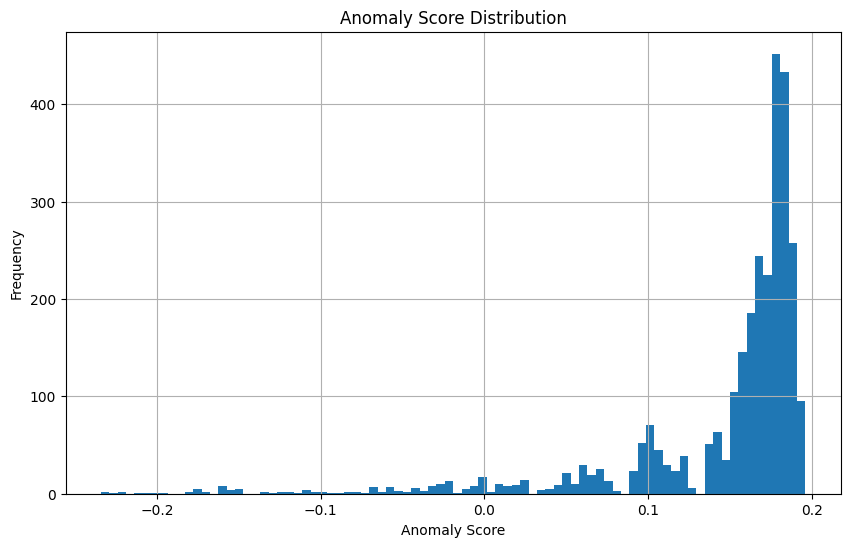

In [13]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ml dataset1.csv')

df['Traffic Volume'] = df['Traffic Volume'].fillna(df['Traffic Volume'].mean())

X = df[['Traffic Volume']]

isolation_forest = IsolationForest(contamination=0.05, random_state=42)

isolation_forest.fit(X)
df['anomaly_score'] = isolation_forest.decision_function(X)
df['anomaly'] = isolation_forest.predict(X)

plt.figure(figsize=(10, 6))
plt.hist(df['anomaly_score'], bins='auto')
plt.title('Anomaly Score Distribution')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
anomalies = df[df['anomaly'] == -1]
anomalies.to_csv('/content/anomalies.csv', index=False)


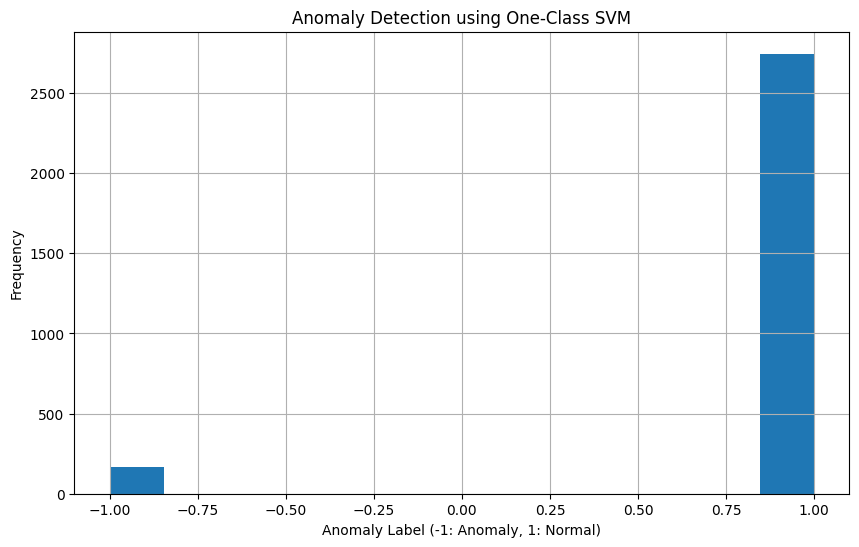

Detected Anomalies:


In [15]:
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt

df = pd.read_csv('/content/ml dataset1.csv')

df['Traffic Volume'] = df['Traffic Volume'].fillna(df['Traffic Volume'].mean())

X = df[['Traffic Volume']]

svm = OneClassSVM(nu=0.05)

svm.fit(X)
df['anomaly'] = svm.predict(X)

plt.figure(figsize=(10, 6))
plt.hist(df['anomaly'], bins='auto')
plt.title('Anomaly Detection using One-Class SVM')
plt.xlabel('Anomaly Label (-1: Anomaly, 1: Normal)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

anomalies = df[df['anomaly'] == -1]
print("Detected Anomalies:")
anomalies.to_csv('/content/anomalies_svm.csv', index=False)


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df, encoder=None):

    df['Hour'] = df['Hour'].apply(lambda x: int(x.split(':')[0]) + 0.5 if '-' in x else int(x.split(':')[0]))


    combined_categories = pd.concat([df['From'], df['To']])


    if encoder is None:
        encoder = LabelEncoder()
        encoder.fit(combined_categories)

    df['From_encoded'] = encoder.transform(df['From'])
    df['To_encoded'] = encoder.transform(df['To'])

    return df, encoder


def train_model(df):
    try:
        X = df[['From_encoded', 'To_encoded', 'Week', 'Hour']]
        y = df['Traffic Volume'].apply(lambda x: 'high' if x > 30 else 'low')


        if y.isnull().any():
            raise ValueError("Target variable 'y' contains null values.")
        if not set(y.unique()).issubset({'high', 'low'}):
            raise ValueError(f"Target variable 'y' contains unexpected values: {set(y.unique()) - {'high', 'low'}}")


        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


        clf = DecisionTreeClassifier(random_state=42)


        clf.fit(X_train, y_train)


        y_pred = clf.predict(X_test)


        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

        return clf, encoder
    except KeyError as e:
        print(f"Key error: {e}. Please check if all necessary columns are present in the dataframe.")
    except ValueError as e:
        print(f"Value error: {e}. Please check the target variable 'Traffic Volume' for unexpected values or nulls.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


def predict_traffic_condition(clf, encoder, user_from, user_to, week, hour):
    if user_from not in df['From'].values or user_to not in df['To'].values:
        return "Invalid input"
    else:
        user_from_encoded = encoder.transform([user_from])[0]
        user_to_encoded = encoder.transform([user_to])[0]
        user_input = pd.DataFrame({'From_encoded': [user_from_encoded], 'To_encoded': [user_to_encoded], 'Week': [week], 'Hour': [hour]})
        predicted_condition = clf.predict(user_input)[0]
        return predicted_condition


if __name__ == "__main__":

    file_path = '/content/ml dataset1.csv'
    df = load_data(file_path)
    df, encoder = preprocess_data(df)


    trained_model, encoder = train_model(df)

    if trained_model is not None:

        user_from = input("Enter 'From' location: ")
        user_to = input("Enter 'To' location: ")
        week = int(input("Enter week number (e.g., 2): "))
        hour = float(input("Enter hour (e.g., 12.0 for 12 PM, 0.5 for 12:30 AM): "))


        predicted_condition = predict_traffic_condition(trained_model, encoder, user_from, user_to, week, hour)
        print(f"Predicted Traffic Condition from {user_from} to {user_to} at week {week} and hour {hour}: {predicted_condition}")


Classification Report:
              precision    recall  f1-score   support

        high       0.93      0.98      0.95       454
         low       0.90      0.74      0.81       129

    accuracy                           0.92       583
   macro avg       0.91      0.86      0.88       583
weighted avg       0.92      0.92      0.92       583

Accuracy: 0.9245283018867925
Enter 'From' location: UNION PLACE
Enter 'To' location: VAN DUZER STREET
Enter week number (e.g., 2): 5
Enter hour (e.g., 12.0 for 12 PM, 0.5 for 12:30 AM): 11.5
Predicted Traffic Condition from UNION PLACE to VAN DUZER STREET at week 5 and hour 11.5: high


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        return df
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return None
    except Exception as e:
        print(f"An unexpected error occurred while loading the data: {e}")
        return None

def preprocess_data(df, encoder=None):
    try:

        df['Hour'] = df['Hour'].apply(lambda x: int(x.split(':')[0]) + 0.5 if '-' in x else int(x.split(':')[0]))


        df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
        df['Day'] = df['Date'].dt.day
        df['Month'] = df['Date'].dt.month


        combined_categories = pd.concat([df['From'], df['To']])

        if encoder is None:
            encoder = LabelEncoder()
            encoder.fit(combined_categories)

        df['From_encoded'] = encoder.transform(df['From'])
        df['To_encoded'] = encoder.transform(df['To'])

        return df, encoder
    except KeyError as e:
        print(f"Key error: {e}. Please check if all necessary columns are present in the dataframe.")
        return None, None
    except Exception as e:
        print(f"An unexpected error occurred during preprocessing: {e}")
        return None, None

def train_model(df):
    try:
        X = df[['From_encoded', 'To_encoded', 'Week', 'Hour', 'Day', 'Month']]
        y = df['Traffic Volume'].apply(lambda x: 'high' if x > 30 else 'low')

        if y.isnull().any():
            raise ValueError("Target variable 'y' contains null values.")
        if not set(y.unique()).issubset({'high', 'low'}):
            raise ValueError(f"Target variable 'y' contains unexpected values: {set(y.unique()) - {'high', 'low'}}")

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        clf = DecisionTreeClassifier(random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Accuracy:", accuracy_score(y_test, y_pred))

        return clf, clf.classes_
    except KeyError as e:
        print(f"Key error: {e}. Please check if all necessary columns are present in the dataframe.")
        return None, None
    except ValueError as e:
        print(f"Value error: {e}. Please check the target variable 'Traffic Volume' for unexpected values or nulls.")
        return None, None
    except Exception as e:
        print(f"An unexpected error occurred during model training: {e}")
        return None, None

def predict_traffic_condition(clf, encoder, df_classes, user_from, user_to, week, hour, date):
    try:
        if user_from not in encoder.classes_ or user_to not in encoder.classes_:
          print("Invalid input: Location not found.")
          return

        user_from_encoded = encoder.transform([user_from])[0]
        user_to_encoded = encoder.transform([user_to])[0]

        user_input = pd.DataFrame({'From_encoded': [user_from_encoded], 'To_encoded': [user_to_encoded], 'Week': [week], 'Hour': [hour], 'Date': [date]})


        user_input['Date'] = pd.to_datetime(user_input['Date'], format='%d-%m-%Y')
        user_input['Day'] = user_input['Date'].dt.day
        user_input['Month'] = user_input['Date'].dt.month

        predicted_class = clf.predict(user_input[['From_encoded', 'To_encoded', 'Week', 'Hour', 'Day', 'Month']])[0]
        predicted_condition = 'high' if predicted_class == df_classes[1] else 'low'

        return predicted_condition
    except Exception as e:
        return f"Prediction error: {e}. Please check your inputs and try again."

if __name__ == "__main__":
    try:
        file_path = '/content/ml dataset1.csv'
        df = load_data(file_path)

        if df is not None:
            df, encoder = preprocess_data(df)

            if df is not None and encoder is not None:
                trained_model, df_classes = train_model(df)

                if trained_model is not None and df_classes is not None:
                    user_from = input("Enter 'From' location: ")
                    user_to = input("Enter 'To' location: ")
                    week = int(input("Enter week number (e.g., 2): "))
                    hour = float(input("Enter hour (e.g., 12.0 for 12 PM, 0.5 for 12:30 AM): "))
                    date_str = input("Enter date (format DD-MM-YYYY): ")

                    predicted_condition = predict_traffic_condition(trained_model, encoder, df_classes, user_from, user_to, week, hour, date_str)
                    print(f"Predicted Traffic Condition from {user_from} to {user_to} at week {week}, hour {hour}, and date {date_str}: {predicted_condition}")
                else:
                    print("Failed to train model.")
            else:
                print("Failed to preprocess data.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


Classification Report:
              precision    recall  f1-score   support

        high       0.93      0.92      0.93       454
         low       0.72      0.78      0.75       129

    accuracy                           0.89       583
   macro avg       0.83      0.85      0.84       583
weighted avg       0.89      0.89      0.89       583

Accuracy: 0.8850771869639794
Enter 'From' location: UNION PLACE
Enter 'To' location: VAN DUZER STREET
Enter week number (e.g., 2): 4
Enter hour (e.g., 12.0 for 12 PM, 0.5 for 12:30 AM): 1.0
Enter date (format DD-MM-YYYY): 11-11-2024
Predicted Traffic Condition from UNION PLACE to VAN DUZER STREET at week 4, hour 1.0, and date 11-11-2024: low


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


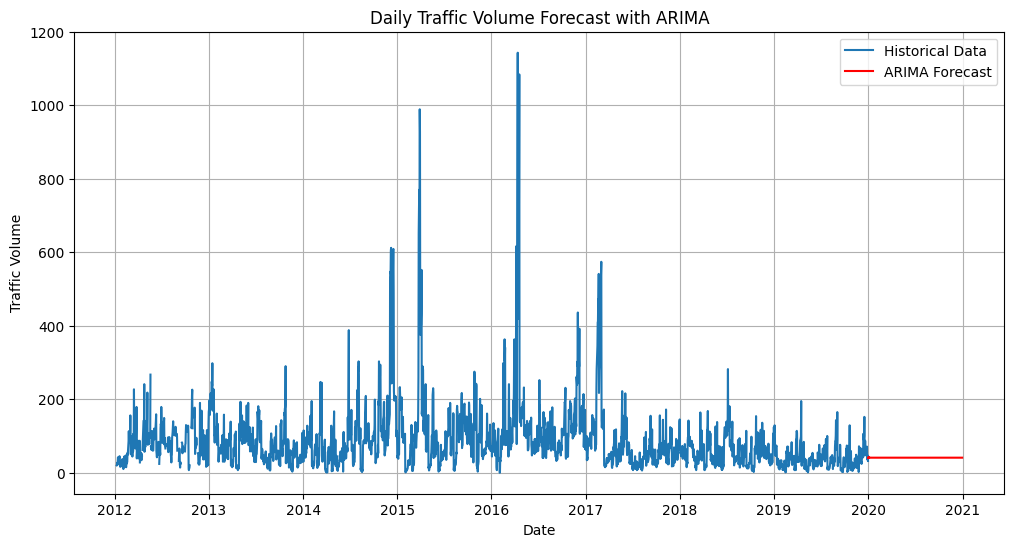

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


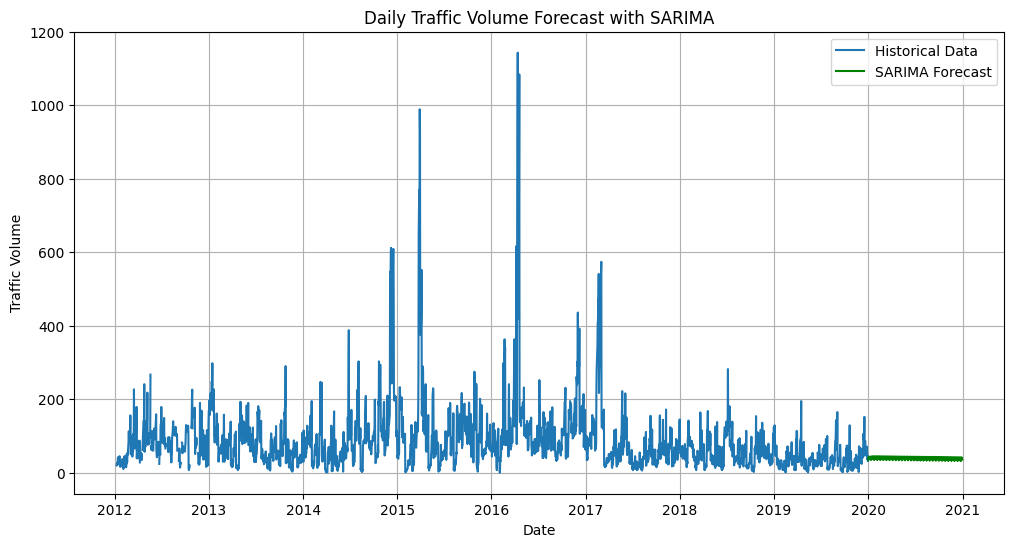

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
df=pd.read_csv("/content/ml dataset1.csv")
traffic_data = df[['Date', 'Traffic Volume']].copy()
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'], format='%d-%m-%Y')
traffic_data.set_index('Date', inplace=True)

arima_model = ARIMA(traffic_data, order=(5, 1, 0))  # Adjusting parameters
arima_result = arima_model.fit()
forecast_steps = 365
arima_forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(start=traffic_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')
arima_forecast_df = arima_forecast.summary_frame()
arima_forecast_df.index = forecast_index

plt.figure(figsize=(12, 6))
plt.plot(traffic_data.index, traffic_data['Traffic Volume'], label='Historical Data')
plt.plot(arima_forecast_df.index, arima_forecast_df['mean'], label='ARIMA Forecast', color='red')
plt.title('Daily Traffic Volume Forecast with ARIMA')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


sarima_model = SARIMAX(traffic_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()
sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)
sarima_forecast_df = sarima_forecast.summary_frame()
sarima_forecast_df.index = forecast_index

plt.figure(figsize=(12, 6))
plt.plot(traffic_data.index, traffic_data['Traffic Volume'], label='Historical Data')
plt.plot(sarima_forecast_df.index, sarima_forecast_df['mean'], label='SARIMA Forecast', color='green')
plt.title('Daily Traffic Volume Forecast with SARIMA')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

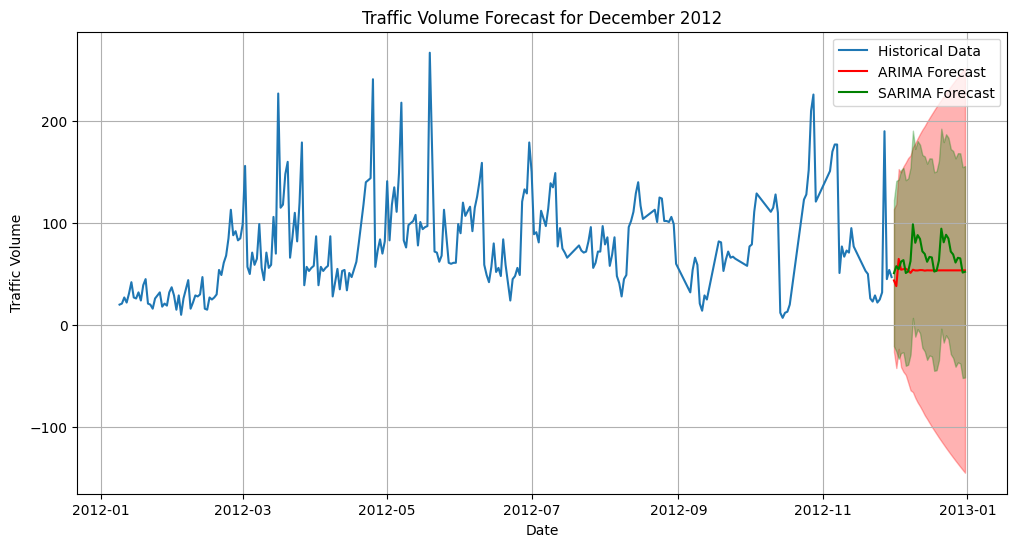

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load and preprocess the data
traffic_data = pd.read_csv('/content/ml dataset1.csv')
traffic_data['Date'] = pd.to_datetime(traffic_data['Date'], format='%d-%m-%Y')
traffic_data.set_index('Date', inplace=True)

# Coerce 'Traffic Volume' to numeric and drop missing values
traffic_data['Traffic Volume'] = pd.to_numeric(traffic_data['Traffic Volume'], errors='coerce')
traffic_data = traffic_data.dropna(subset=['Traffic Volume'])

# Ensure data used for training ends before December 2012
training_data = traffic_data.loc[traffic_data.index < '2012-12-01']

# Define forecast period (December 1, 2012 to December 31, 2012)
forecast_period = '2012-12-01'
forecast_end = '2012-12-31'
forecast_steps = 31  # December has 31 days


arima_model = ARIMA(training_data['Traffic Volume'], order=(5, 1, 0))  # Adjust order as needed
arima_result = arima_model.fit()


arima_forecast = arima_result.get_forecast(steps=forecast_steps)
arima_forecast_df = arima_forecast.summary_frame()
forecast_index = pd.date_range(start=forecast_period, periods=forecast_steps, freq='D')
arima_forecast_df.index = forecast_index


sarima_model = SARIMAX(training_data['Traffic Volume'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()


sarima_forecast = sarima_result.get_forecast(steps=forecast_steps)
sarima_forecast_df = sarima_forecast.summary_frame()
sarima_forecast_df.index = forecast_index


plt.figure(figsize=(12, 6))
plt.plot(training_data.index, training_data['Traffic Volume'], label='Historical Data')


plt.plot(arima_forecast_df.index, arima_forecast_df['mean'], label='ARIMA Forecast', color='red')
plt.fill_between(arima_forecast_df.index, arima_forecast_df['mean_ci_lower'], arima_forecast_df['mean_ci_upper'], color='red', alpha=0.3)


plt.plot(sarima_forecast_df.index, sarima_forecast_df['mean'], label='SARIMA Forecast', color='green')
plt.fill_between(sarima_forecast_df.index, sarima_forecast_df['mean_ci_lower'], sarima_forecast_df['mean_ci_upper'], color='green', alpha=0.3)


plt.title('Traffic Volume Forecast for December 2012')
plt.xlabel('Date')
plt.ylabel('Traffic Volume')
plt.legend()
plt.grid(True)
plt.show()
